# Visualization using the `lucifex.viz` module

In [ ]:
import numpy as np
from IPython.display import HTML
from dolfinx.fem import FunctionSpace
from lucifex.mesh import rectangle_mesh
from lucifex.fem import Function
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.utils import cross_section
from lucifex.io import write, get_ipynb_file_name

: 

## Colormaps

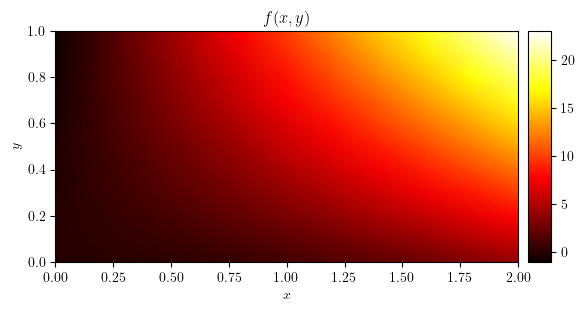

In [2]:
mesh = rectangle_mesh(2.0, 1.0, 10, 10)
fs = FunctionSpace(mesh, ('P', 1))

f = Function(fs, lambda x: x[0]**2 - x[1]**2 + 10 * x[0] * x[1], name='f')
fig, ax = plot_colormap(f, title='$f(x,y)$')

## Cross-sections

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$y$', ylabel='$f(x=1.00)$'>)

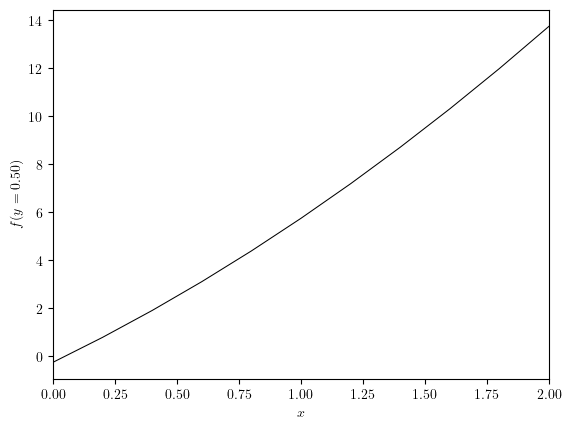

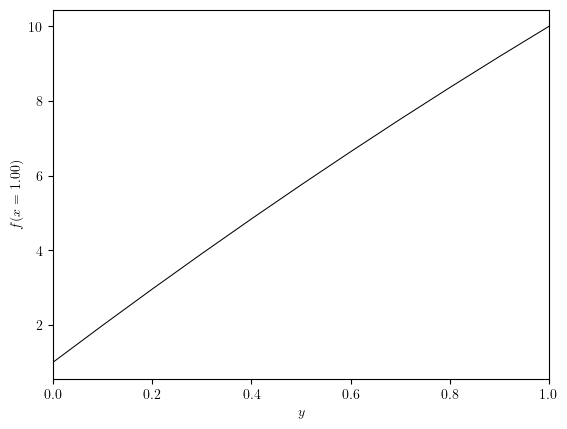

In [6]:
x_axis, fx, y_value = cross_section(f, 'y', 0.5)
plot_line((x_axis, fx), x_label='$x$', y_label=f'${f.name}(y={y_value:.2f})$')

y_axis, fy, x_value = cross_section(f, 'x', 0.5)
plot_line((y_axis, fy), x_label='$y$', y_label=f'${f.name}(x={x_value:.2f})$')

## Animation

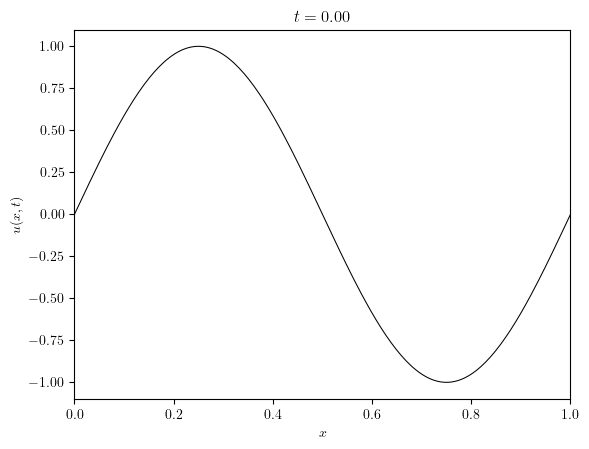

In [ ]:
x_axis = np.linspace(0, 1, num=200)
times = np.linspace(0, 2, num=200)
fxt = lambda x, t: np.sin(2 * np.pi * (x - t))

line_series = [
    (x_axis, fxt(x_axis, t)) for t in times 
]
title_series = [f'$t={t:.2f}$' for t in times]

anim = create_animation(
    plot_line,
    x_label='$x$',
    y_label='$u(x,t)$',
)(line_series, title=title_series)
write(anim, f'{get_ipynb_file_name()}_animation', './figures')

In [ ]:
HTML(anim.to_html5_video())